In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [33]:
main_path = '/scratch/'
data_path = os.path.join(main_path,'data.pkl')
epochs_path = os.path.join(main_path,'epochs.pkl')
photostim_path = os.path.join(main_path,'photostim.pkl')
visualstim_path = os.path.join(main_path,'visualstim.pkl')

In [83]:
df_data = pd.read_pickle(data_path)
df_epochs = pd.read_pickle(epochs_path)
df_photostim = pd.read_pickle(photostim_path)
df_visualstim_path = pd.read_pickle(visualstim_path)

In [36]:
average_waveforms = df_data.iloc[0]["RFMapping_0_waveform"]

In [37]:
average_waveforms.shape

(384, 90)

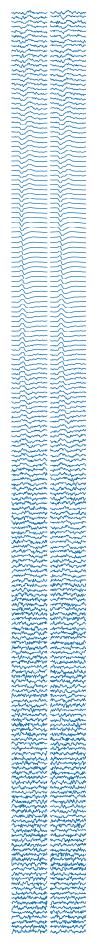

In [63]:
fig, axes = plt.subplots(nrows=192, ncols=2, figsize=(1, 12), 
                         constrained_layout=False)

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(average_waveforms[i], linewidth=0.5)
    ax.axis("off")  # remove axes, ticks, labels

plt.subplots_adjust(wspace=0, hspace=0)  # minimize gaps
plt.show()

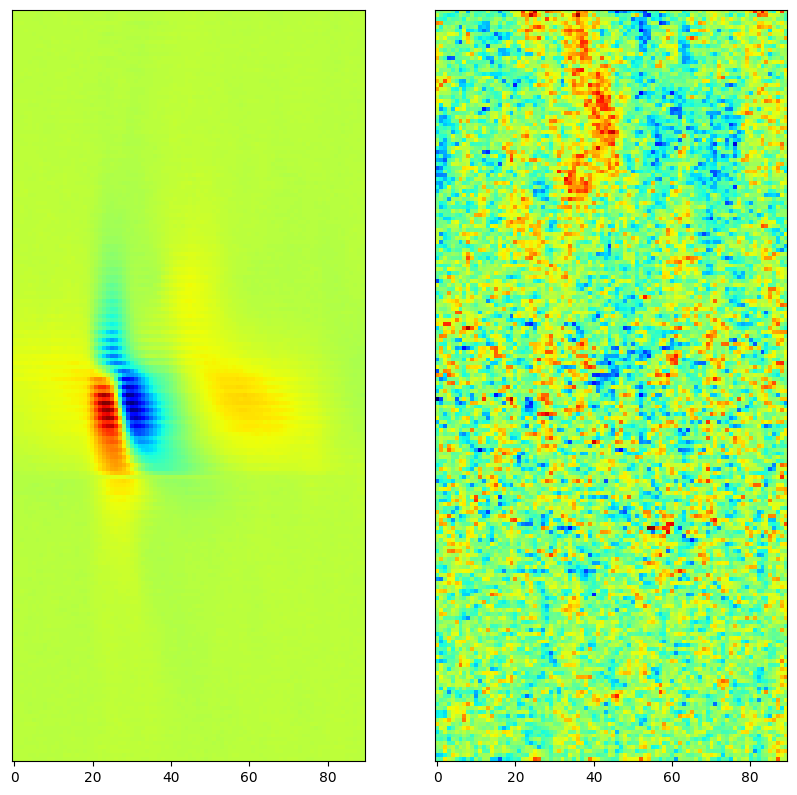

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 50), 
                         constrained_layout=False)
axes[0].imshow(average_waveforms[:192,:],cmap='jet')
axes[1].imshow(average_waveforms[192:,:],cmap='jet')
#axes[0].axis('off')
#axes[1].axis('off')
# Remove y axis, keep x axis
for ax in axes:
    ax.get_yaxis().set_visible(False)   # hide y axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)  # keep x ticks


In [65]:
def calculate_amp(signal):
    '''
    calculate amp
    '''
    
    return np.max(signal)- np.min(signal)
snr_per_signal = np.apply_along_axis(calculate_amp, axis=1, arr=average_waveforms)

In [67]:
np.argmax(snr_per_signal)

np.int64(100)

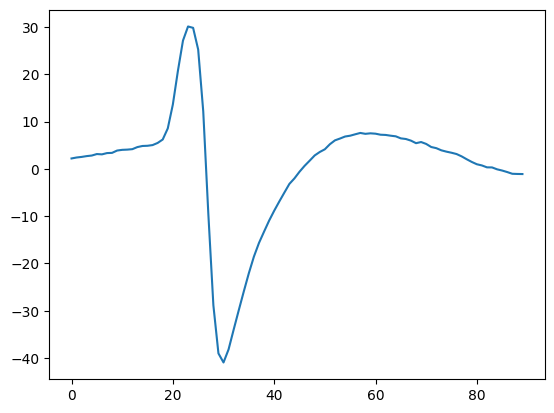

In [69]:
plt.plot(average_waveforms[100,:])

In [81]:
def bin_spikes(spike_times, end_time, bin_size):
  """
  Bins spike events into a time series.

  Args:
    spike_times: A 1D numpy array of spike timestamps.
    end_time: The end time of the recording.
    bin_size: The desired time bin size.

  Returns:
    A tuple containing:
      - binned_spikes: A 1D numpy array where each element is the count of spikes in the corresponding time bin.
      - bin_centers: A 1D numpy array of the center timestamp for each bin.
  """
  # Create the time bins
  bins = np.arange(0, end_time + bin_size, bin_size)

  # Use numpy.histogram to count the spikes in each bin
  binned_spikes, bin_edges = np.histogram(spike_times, bins=bins)

  # Calculate the center of each bin
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

  return binned_spikes, bin_centers

,stim_name,start_time,stop_time
id,,,
0,Spontaneous_0,40.98221,1242.959627
1,RFMapping_0,1253.51491,2455.941363
2,OptoTagging_0,2467.50393,2706.501100
3,Injection,2706.51110,2846.239800
4,Spontaneous_1,2846.24980,4048.293960
5,RFMapping_1,4058.84910,5261.091884
6,OptoTagging_1,5273.65616,5512.558350
7,Spontaneous_2,5522.10880,6724.486726
8,RFMapping_2,6734.49157,7936.617586


In [93]:
stim_ep = 'RFMapping_0'
start_time = df_epochs[df_epochs['stim_name']==stim_ep]['start_time'].iloc[0]
end_time = df_epochs[df_epochs['stim_name']==stim_ep]['stop_time'].iloc[0]

In [ ]:
epoch = 'Spontaneous_0'
epoch_col_name = f'{epoch}_spikes'
start_time = df_epochs[df_epochs['stim_name'] == epoch]['start_time'][0]
stop_time = df_epochs[df_epochs['stim_name'] == epoch]['stop_time'][0]